In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
tf.test.is_gpu_available()

True

In [3]:
data_dir = glob('../input/intel-image-classification/seg_train/seg_train/*')

In [4]:
data_dir

['../input/intel-image-classification/seg_train/seg_train/mountain',
 '../input/intel-image-classification/seg_train/seg_train/street',
 '../input/intel-image-classification/seg_train/seg_train/buildings',
 '../input/intel-image-classification/seg_train/seg_train/sea',
 '../input/intel-image-classification/seg_train/seg_train/forest',
 '../input/intel-image-classification/seg_train/seg_train/glacier']

In [5]:
print(len(glob(data_dir[0] + '/*')))
print(len(glob(data_dir[1] + '/*')))
print(len(glob(data_dir[2] + '/*')))
print(len(glob(data_dir[3] + '/*')))
print(len(glob(data_dir[4] + '/*')))
print(len(glob(data_dir[5] + '/*')))

2512
2382
2191
2274
2271
2404


In [6]:
categories = len(data_dir)
print(categories)

6


In [7]:
IMAGE_SIZE = [150,150]
model = VGG16(include_top = False,input_shape = IMAGE_SIZE + [3],weights = 'imagenet')
for layers in model.layers:
    layers.trainable = False
#     print(layers)

58892288/58889256 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
#modifying the model
x = tf.keras.layers.Flatten()(model.output)
# x = tf.keras.layers.Dense(units = 4096,activation = 'relu')(x)
x = tf.keras.layers.Dense(units = categories,activation = 'softmax')(x)

In [10]:
model = tf.keras.Model(inputs = model.input,outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
#Hyperparameters
lr = 1e-4
batch_size = 32

In [12]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimiser = tf.keras.optimizers.Adam(learning_rate = lr)
model.compile(loss = loss_fn,optimizer = optimiser,metrics = ['accuracy'])

In [13]:
train_path = '../input/intel-image-classification/seg_train/seg_train'
val_path = '../input/intel-image-classification/seg_test/seg_test'

In [14]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,
                                                                  rescale = 1./255,
                                                                 shear_range = 0.2,
                                                                 zoom_range = 0.2)
train_ds = train_generator.flow_from_directory(train_path,
                                               class_mode = 'categorical',
                                               target_size = (150,150),
                                               batch_size = batch_size)
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_ds = val_generator.flow_from_directory(val_path,
                                          class_mode = 'categorical',
                                          target_size = (150,150),
                                          batch_size = batch_size)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


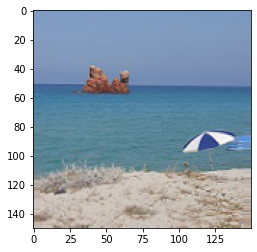

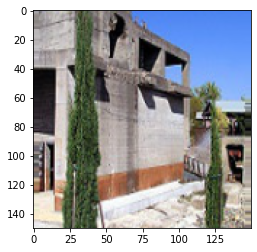

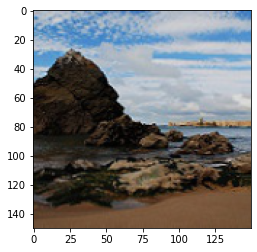

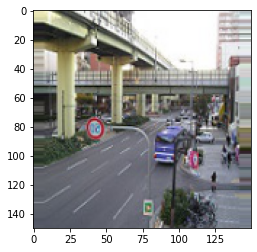

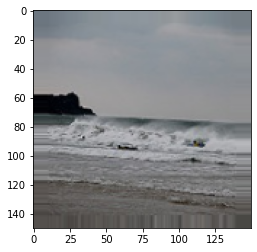

In [15]:
img = next(train_ds)[0]
for i in range(5):
    plt.imshow(img[i])
    plt.show()

In [16]:
print(img.shape)

(32, 150, 150, 3)


In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 3,min_delta = 0.005)

In [18]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    steps_per_epoch = len(train_ds),
                    validation_steps = len(val_ds), 
                    epochs = 12,
                    callbacks = [callback])

Epoch 1/12
439/439 [==============================] - 815s 2s/step - loss: 1.1217 - accuracy: 0.6223 - val_loss: 0.5199 - val_accuracy: 0.8293
Epoch 2/12
439/439 [==============================] - 793s 2s/step - loss: 0.5382 - accuracy: 0.8174 - val_loss: 0.4361 - val_accuracy: 0.8420
Epoch 3/12
439/439 [==============================] - 793s 2s/step - loss: 0.4245 - accuracy: 0.8565 - val_loss: 0.4004 - val_accuracy: 0.8527
Epoch 4/12
439/439 [==============================] - 793s 2s/step - loss: 0.4030 - accuracy: 0.8581 - val_loss: 0.3750 - val_accuracy: 0.8650
Epoch 5/12
439/439 [==============================] - 793s 2s/step - loss: 0.3717 - accuracy: 0.8708 - val_loss: 0.3603 - val_accuracy: 0.8700
Epoch 6/12
439/439 [==============================] - 793s 2s/step - loss: 0.3667 - accuracy: 0.8682 - val_loss: 0.3492 - val_accuracy: 0.8713
Epoch 7/12
439/439 [==============================] - 793s 2s/step - loss: 0.3473 - accuracy: 0.8779 - val_loss: 0.3391 - val_accuracy: 0.8767

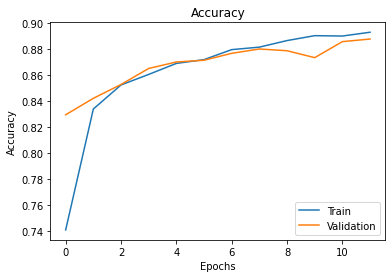

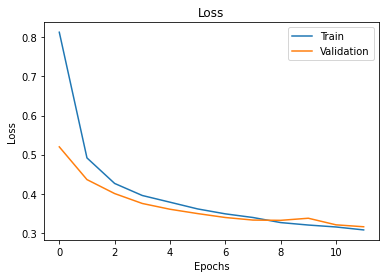

In [20]:
obj = history.history
plt.plot(obj['accuracy'])
plt.plot(obj['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc = 'lower right')
plt.show()

plt.plot(obj['loss'])
plt.plot(obj['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()